<a href="https://colab.research.google.com/github/Lu1sV1rus/EDP/blob/main/Ecuaci%C3%B3n_del_calor_M%C3%A9todo_de_Richardson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=9> Método implícito de Richardson </font>

----

<font size=4 color="skyblue">
Escribir el problema a resolver, la ecuación en diferencias del método y explicar de manera concisa.

<font size=3>Importamos las librerias necesarias

In [6]:
# Librerias
import sympy as sp
import numpy as np

<font size=3>Definimos la función <font color="skyblue">$f(x)$</font>, que nos regresara el valor de <font color="skyblue">$x$</font> evaluado.

<font size=3>Definimos la Matriz tridiagonal <font size=3 color="skyblue">$A$ </font>


In [7]:
def f(x):                                      # Definimos la funcion que evalua x
    return np.sin(np.pi*x)                     # Nos regresa el valor f(x)

A = sp.Matrix([[3,-1, 0, 0, 0, 0, 0, 0, 0],    # Definimos la matriz A
              [-1, 3,-1, 0, 0, 0, 0, 0, 0],
              [0, -1, 3,-1, 0, 0, 0, 0, 0],
              [0, 0, -1, 3,-1, 0, 0, 0, 0],
              [0, 0, 0, -1, 3,-1, 0, 0, 0],
              [0, 0, 0, 0, -1, 3,-1, 0, 0],
              [0, 0, 0, 0, 0, -1, 3,-1, 0],
              [0, 0, 0, 0, 0, 0, -1, 3,-1],
              [0, 0, 0, 0, 0, 0, 0, -1, 3,]])
A

Matrix([
[ 3, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  3, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  3, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  3, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  3, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  3, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  3, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  3, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  3]])

<font size=4 color="skyblue">Ejercicio 1: </font>
<font size=4> Codificar la matriz A de manera más simple.</font>

----

Creamos variables que reutilizaremos, para la creacion de las matrices:

<font color="skyblue"> $n$ </font> es el tamaño de la matriz

<font color="skyblue"> $dp$ </font> es el valor en la diagonal principal

<font color="skyblue"> $ds$ </font> es el valor en las diagonales superior e inferior

In [8]:
n=9         # Tamaño de la Matriz A_nxn
# Variables
dp = 3      # Valor en la diagonal principal
ds = -1     # Valor en las diagonales superior e inferior

<font size=3 color="tomato">Matriz $A$ usando NumPy </font>

<p><font color="tomato"> np.dialog </font> Sirve para sustituir valores en una diagonal;</p><p>
&nbsp;&nbsp;&nbsp;&nbsp;El valor a sustituir <font color="tomato"> $dp=$ 3 </font> ó  <font color="tomato"> $ds=$ -1 </font></p><p>
&nbsp;&nbsp;&nbsp;&nbsp;La posicion que sustituira <font color="tomato"> $k$ </font> (<font color="tomato"> 0, 1, -1 </font>)</p><p>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Donde </p><p>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;k=0 es la diagonal principal</p><p>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;k=1,-1 son las diagonales superior e inferior respectivamente.</p><p>
<font color="tomato">np.full</font> Sirve para indicar que todos los valores en la diagonal son iguales; </p><p>
&nbsp;&nbsp;&nbsp;&nbsp;<font color="tomato"> $n$ </font> el numero de valores, en este caso <font color="tomato"> 9 </font>en la matriz principal y <font color="tomato"> 8 </font>en la matriz secundaria</p><p>
&nbsp;&nbsp;&nbsp;&nbsp;Mientras que el segundo numero, es el valor de la diagonal, ya sea <font color="tomato"> $dp=$ 3 </font> ó  <font color="tomato"> $ds=$ -1 </font></p>

In [9]:
A_np = sp.Matrix(                          # Creamos la matriz con sp, para que tenga el mismo formato
        np.diag(np.full(n, dp)) +          # Indicamos que la diagonal principal sean 3, 9x3
        np.diag(np.full(n-1, ds), k=1) +   # Indicamos que la diagonal superior sean -1, 8x1
        np.diag(np.full(n-1, ds), k=-1))   # Indicamos que la diagonal inferior sean -1, 8x1

print("Matriz A usando NumPy \n")
A_np                                       # Llamamos a la matriz A_numpy

Matriz A usando NumPy 



Matrix([
[ 3, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  3, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  3, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  3, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  3, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  3, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  3, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  3, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  3]])

<font size=3 color="purple">Matriz $A$ usando el ciclo For </font>

<p><font color="purple"> sp.zeros </font> Sirve para crear una matriz $A$ de tamaño <font color="purple"> $nxn$ </font> de puros ceros
</p><p>
Iniciamos un ciclo for de tamaño <font color="purple"> $n$ </font>
</p><p>
&nbsp;&nbsp;&nbsp;&nbsp;<font color="purple"> A_for$[i, i]$ </font> indica que en las diagonales sustituira los ceros por <font color="purple"> $dp$ </font> (<font color="purple"> 3 </font>)
</p><p>
Creamos una condicion: <font color="purple"> $i > 0$ </font>, es decir, apartir de la segunda iteracion, incluira un <font color="purple"> -1 </font>, a la izquierda
</p><p>
&nbsp;&nbsp;&nbsp;&nbsp;<font color="purple"> A_for$[i, i-1]$ </font> indica que los valores en la diagonal inferior se deben sustituir por <font color="purple"> $ds$ </font> (<font color="purple"> -1 </font>)
</p><p>
Creamos otra condicion: <font color="purple"> $i < n-1$ </font>, es decir, incluira un <font color="purple"> -1 </font>, a la derecha, en todo el ciclo, menos en la ultima iteracion.
</p><p>
&nbsp;&nbsp;&nbsp;&nbsp;<font color="purple"> A_for$[i, i+1]$ </font> indica que los valores en la diagonal superor se deben sustituir por <font color="purple"> $ds$ </font> (<font color="purple"> -1 </font>)</p>

In [10]:
# Creamos la matriz A (N x N) con ceros
A_for = sp.zeros(n, n)

# Creamos un ciclo for que modifique las diagonales
for i in range(n):
    A_for[i, i] = dp            # Diagonal (i, i)

    if i > 0:                   # Apartir de la segunda iteracion sustituira ds a la izquierda
        A_for[i, i-1] = ds      # Diagonal Inferior (i, i-1)

    if i < n - 1:               # Sustituira ds a la derecha menos en la ultima iteracion
        A_for[i, i+1] = ds      # Diagonal Superior (i, i+1)

print("Matriz A usando un ciclo For \n")
A_for                           # Llamamos a la funcion A_for

Matriz A usando un ciclo For 



Matrix([
[ 3, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  3, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  3, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  3, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  3, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  3, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  3, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  3, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  3]])

---

<font size=3> Definimos la matriz de soluciones <font color="skyblue">$b$

In [11]:
b = sp.Matrix([f(0.1), f(0.2), f(0.3), f(0.4), f(0.5), f(0.6), f(0.7), f(0.8), f(0.9)])
b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

<font size=4 color="skyblue">Ejercicio 2: </font>
<font size=4> Definir las entradas de b de manera más simple (quizás con un bucle).

----

Creamos variables que reutilizaremos, para la creacion de las matrices:

<font color="skyblue"> $nb$ </font> es el tamaño de la matriz <font color="skyblue"> $b$ </font>

In [12]:
nb=9

<font size=3 color="tomato">Matriz $b$ usando un ciclo For </font>

<p><font color="tomato"> sp.zeros </font> Sirve para crear una matriz $b$ de tamaño <font color="tomato"> $nb$x$1$ </font> de puros ceros
</p><p>
Iniciamos un ciclo for de tamaño <font color="tomato"> $nb$ </font>
</p><p>
&nbsp;&nbsp;&nbsp;&nbsp;
<font color="tomato"> b$[i]$ </font> es la posicion que se cambiara por <font color="tomato"> $f(0.1*(i+1))$ </font>
</p><p>&nbsp;&nbsp;&nbsp;&nbsp;
(esta inicia en $i+1$, ya que el primer valor de b es 1, mientras que el ciclo for inicia en 0)</p>

In [13]:
b1 = sp.zeros(nb,1)        # Matriz de de ceros

for i in range(nb):        # Creamos un ciclo for que modifique las diagonales
    b1[i] = f(0.1*(i+1))   # Sustituimos los ceros por el valor en f(x)
b1                         # Llamamos a la Matriz b for version 1 -> b1

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

<font size=3 color="purple">Matriz $b$ usando un ciclo For (version corta)</font>

<p><font color="purple"> sp.Matrix </font> Sirve para crear una matriz que contiene una "lista" de valores <font color="purple"> $f(x)$ for $i$ in range ($nb$)</font> con los valores correspondientes de b
</p><p>
El ciclo for es de tamaño <font color="purple"> $nb$ </font>
</p><p>
<font color="purple"> $f(0.1*(i+1))$ </font> es funcion que se itera <font color="purple"> $i$ </font> veces, evaluada en el valor <font color="purple"> $0.1*(i+1)$ </font></p><p>
&nbsp;&nbsp;&nbsp;&nbsp;(esta inicia en $i+1$, ya que el primer valor de b es 1, mientras que el ciclo for inicia en 0)</p>

In [14]:
b2 = sp.Matrix([f(0.1*(i+1)) for i in range(nb)])   # Creamos una Matriz con los valores de la f(i+1)
b2                                                  # Llamamos a la Matriz b for version 2 -> b2

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

<font size=4 color="skyblue">Solución: </font>


<font size=2> A modo de comprobación verificare que las soluciones son iguales.

----


In [15]:
S1=A.LUsolve(b)                 # Guardamos los valores originales en S1
S2=A_np.LUsolve(b1)             # Guardamos los valores de A_numpy y b for version 1
S3=A_for.LUsolve(b2)            # Guardamos los valores de A_for y b for version 2

In [16]:
print("Metodo 1       | Metodo 2       | Metodo 3       | Dif 1-2 | Dif 1-2     ")
for i in range(nb):             # Comparamos los valores en cada intervalo de X
    print(f"{S1[i]:.12f} | {S2[i]:.12f} | {S3[i]:.12f} | {abs((S1[i]-S2[i])):.5f} | {abs((S2[i]-S3[i])):.5f}")

Metodo 1       | Metodo 2       | Metodo 3       | Dif 1-2 | Dif 1-2     
0.281465217776 | 0.281465217776 | 0.281465217776 | 0.00000 | 0.00000
0.535378658952 | 0.535378658952 | 0.535378658952 | 0.00000 | 0.00000
0.736885506787 | 0.736885506787 | 0.736885506787 | 0.00000 | 0.00000
0.866260867035 | 0.866260867035 | 0.866260867035 | 0.00000 | 0.00000
0.910840578024 | 0.910840578024 | 0.910840578024 | 0.00000 | 0.00000
0.866260867035 | 0.866260867035 | 0.866260867035 | 0.00000 | 0.00000
0.736885506787 | 0.736885506787 | 0.736885506787 | 0.00000 | 0.00000
0.535378658952 | 0.535378658952 | 0.535378658952 | 0.00000 | 0.00000
0.281465217776 | 0.281465217776 | 0.281465217776 | 0.00000 | 0.00000


<font size=4 color="lightgreen">Aplicar iteradamente Richardson: </font>


<font size=3> Codigo correspondiente aún bucle de soluciones de richarson</font>

----

<font size=3>Iteracion n+3</font>

Creamos una funcion que nos regrese el siguiente valor de richardson, con un for que se encarge de resolver las matrices y nos retorne el valor de la iteración $j+1$

In [19]:
# Codigo extraido de Github
def richardson_1(A, b, j):
    b_1 = b
    for i in range(j+1):
        sol = A.LUsolve(b_1)
        b_1 = sol
        _ = None #Para que no imprima resultados parciales
    return b_1

print("Siguiente Iteracion \n")
richardson_1(A, b, 2)

Siguiente Iteracion 



Matrix([
[0.233512145842405],
[0.444166495874967],
[0.611342734601339],
[0.718676486989637],
[0.755661177517868],
[0.718676486989637],
[0.611342734601339],
[0.444166495874967],
[0.233512145842405]])

----

<font size=3>Iteracion n=0, n+1, n+2, n+3</font>

Creamos la funcion de richardson que se encarga de resolver la matriz con un for $j+1$ veces, pero esta almacena los resultados en una matriz $S$, lo que nos permite un "historial" de los valores de las iteraciones

In [20]:
# Codigo extraido de Github
def richardson(A, b, j):
    S = []
    b_1 = b.copy()

    for i in range(j+1):
        S.append(np.array(b_1, dtype=float).reshape(-1))  # vector fila
        sol = A.LUsolve(b_1)
        b_1 = sol

    return np.array(S)   # matriz resultado

print("Siguientes Iteraciones; n --> n+3 \n")
sp.Matrix(richardson(A, b, 3))

Siguientes Iteraciones; n --> n+3 



Matrix([
[0.309016994374947, 0.587785252292473, 0.809016994374947, 0.951056516295154,               1.0, 0.951056516295154, 0.809016994374947, 0.587785252292473, 0.309016994374948],
[0.281465217775586, 0.535378658951812, 0.736885506787377,  0.86626086703537,  0.91084057802358,  0.86626086703537, 0.736885506787377, 0.535378658951812, 0.281465217775587],
[0.256369941652248, 0.487644607181158, 0.671185220939413, 0.789025548849704, 0.829630558574329, 0.789025548849704, 0.671185220939413, 0.487644607181158, 0.256369941652248],
[0.233512145842405, 0.444166495874967, 0.611342734601339, 0.718676486989637, 0.755661177517868, 0.718676486989637, 0.611342734601339, 0.444166495874967, 0.233512145842405]])

<font size=4 color="skyblue">Ejercicio 4: </font> <font size=4> Graficar para un valor particular de t > 0 y comparar contra la gráfica de la solución exacta (quizás necesite calcularla).</font>

----

Primero definimos las variables

&nbsp;&nbsp;&nbsp;&nbsp;<font color="tomato"> $j$ </font> El numero de iteraciones

&nbsp;&nbsp;&nbsp;&nbsp;<font color="tomato"> $t$ </font> El intervalo de tiempo

&nbsp;&nbsp;&nbsp;&nbsp;<font color="tomato"> $dt$ </font> El tamaño del paso en el intervalo de tiempo

Creamos una funcion <font color="tomato">$u_{exacta}$</font> que calculara el valor exacto de la función en el valor de espacio (<font color="tomato"> $x$ </font>) y tiempo (<font color="tomato"> $t$ </font>)

Calculamos los valores

&nbsp;&nbsp;&nbsp;&nbsp;<font color="tomato"> $U$ </font> El valor de la funcion en la iteracion <font color="tomato"> $j$ </font> (y las anteriores)

&nbsp;&nbsp;&nbsp;&nbsp;<font color="tomato"> $x$ </font> El tamaño del intervalo de espacio (una lista de 0.1 a 0.9)


In [21]:
# Variables
j = 60                    # El numero de iteraciones
t = 0.6                   # Intervalo de tiempo
dt = t / j                # Tamaño de intervalo de tiempo

def u_exacta(x, t, alpha=1.0):      # Funcion para el valor exacto
    return np.exp(-alpha * (np.pi**2) * t) * np.sin(np.pi * x)  # Nos regresa el valor exacto

U = richardson(A, b, j)   # Resolvemos con Richarson
x = np.linspace(0, 1, 9)  # Creamos la maya de 0.1 a 0.9

Definimos las siguientes variables

&nbsp;&nbsp;&nbsp;&nbsp;<font color="tomato"> $mitad$ </font> La mitad de las iteraciones totales

&nbsp;&nbsp;&nbsp;&nbsp;<font color="tomato"> $t_m$ </font> La mitad del intervalo de tiempo

&nbsp;&nbsp;&nbsp;&nbsp;<font color="tomato"> $U_m$ </font> Los valores en la iteracion correspondiente a la mitad

&nbsp;&nbsp;&nbsp;&nbsp;<font color="tomato">$u_{exacta}$</font> el valor real de la funcion en el punto medio (<font color="tomato"> $x$ </font>) y tiempo (<font color="tomato"> $t_m$ </font>)

In [22]:
mitad = int(j*0.5)                  # Calculamos la mitad de las iteraciones -> j*0.5
t_m = mitad * dt                    # Calculamos el tiempo medio -> t*0.5
u_m = U[mitad, :]                   # Calculamos el valor en U

u_ex = u_exacta(x, t_m, alpha=1.0)  # Calculamos el valor exacto

Guardamos los datos en las sig. Matrices, para darle el formato de sympy

----

&nbsp;&nbsp;&nbsp;&nbsp;<font color="tomato"> $v_{ex}$ </font> El valor exacto de la función

In [23]:
v_ex=sp.Matrix(u_ex)       # Guardamos los valores en una matriz de sympy
v_ex

Matrix([
[                 0.0],
[  0.0198127719896124],
[  0.0366092290470317],
[  0.0478322628455281],
[  0.0517732682263353],
[  0.0478322628455281],
[  0.0366092290470317],
[  0.0198127719896124],
[6.34039672147788e-18]])

&nbsp;&nbsp;&nbsp;&nbsp;<font color="tomato"> $v_{es}$ </font> El valor esperado de la función

In [24]:
v_es=sp.Matrix(u_m)        # Guardamos los valores en una matriz de sympy
v_es

Matrix([
[0.0187608914640572],
[0.0356853361567954],
[0.0491166515121494],
[0.0577400868016604],
[0.0607115200961845],
[0.0577400868016604],
[0.0491166515121494],
[0.0356853361567954],
[0.0187608914640571]])

----

Comparamos los valores, directamente y calculamos el error en cada punto $X$

In [25]:
# Comparamos los valores
print("Valor exacto   | Valor estimado | Diferencia")
for i in range(n):
    print(f"{v_ex[i]:.12f} | {v_es[i]:.12f} | {abs(v_ex[i]-v_es[i]):.12f}")   #Imprimimos los valores y su diferencia

Valor exacto   | Valor estimado | Diferencia
0.000000000000 | 0.018760891464 | 0.018760891464
0.019812771990 | 0.035685336157 | 0.015872564167
0.036609229047 | 0.049116651512 | 0.012507422465
0.047832262846 | 0.057740086802 | 0.009907823956
0.051773268226 | 0.060711520096 | 0.008938251870
0.047832262846 | 0.057740086802 | 0.009907823956
0.036609229047 | 0.049116651512 | 0.012507422465
0.019812771990 | 0.035685336157 | 0.015872564167
0.000000000000 | 0.018760891464 | 0.018760891464


<font size= 3 color="purple"> Finalmente realizamos la grafica </font>

---

Importamos las librerias necesarias

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D
from matplotlib import cm                # colormap

Con matplotlib (<font color="purple"> plt </font>) realizamos la grafica

&nbsp;&nbsp;&nbsp;&nbsp;<font color="purple"> plt.figure() </font> Creamos un plano

&nbsp;&nbsp;&nbsp;&nbsp;<font color="purple"> figsize=() </font>  Indicamos el tamaño del plano

&nbsp;&nbsp;&nbsp;&nbsp;<font color="purple"> plt.plot() </font>  Indicamos los puntos en X del valor esperado

&nbsp;&nbsp;&nbsp;&nbsp;<font color="purple"> plt.plot() </font>  Indicamos los puntos en X del valor exacto

&nbsp;&nbsp;&nbsp;&nbsp;<font color="purple"> plt.title() </font>  Asignamos un titulo ala grafica

&nbsp;&nbsp;&nbsp;&nbsp;<font color="purple"> plt.xlabel() </font>  Asignamos un titulo al eje X

&nbsp;&nbsp;&nbsp;&nbsp;<font color="purple"> plt.ylabel() </font>  Asignamos un titulo al eje Y

&nbsp;&nbsp;&nbsp;&nbsp;<font color="purple"> plt.legend() </font> Mostramos el nombre y color de cada linea

&nbsp;&nbsp;&nbsp;&nbsp;<font color="purple"> plt.grid() </font>  Mostramos la cuadricula

&nbsp;&nbsp;&nbsp;&nbsp;<font color="purple"> plt.show() </font>  Mostramos la grafica

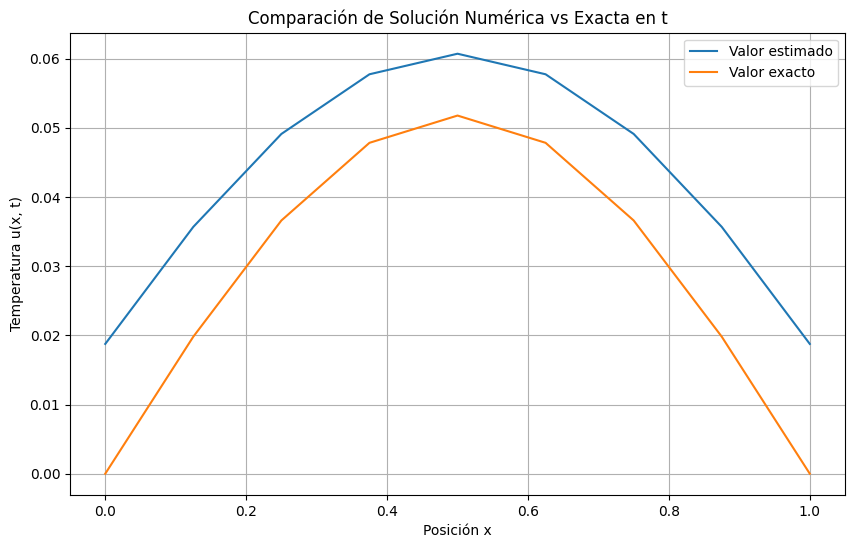

<Figure size 640x480 with 0 Axes>

In [27]:
# Grafica
plt.figure(figsize=(10, 6))                           # Un tamaño de grafica de 10,6
plt.plot(x,(v_es), label='Valor estimado')            # Valores del valor estimado
plt.plot(x,(v_ex), label='Valor exacto')              # Valores del valor exacto
plt.title('Comparación de Solución Numérica vs Exacta en t')     # Titulo
plt.xlabel('Posición x')                              # Eje X
plt.ylabel('Temperatura u(x, t)')                     # Eje Y
plt.legend()                                          # Mostrar los titulos de las lineas
plt.grid()                                            # Mostrar la cuadricula
plt.show()                                            # Mostrar la grafica
plt.savefig('Comparación de Solución Numérica vs Exacta en t')   # Guardar el grafico

<font size=4 color="skyblue">Ejercicio 4: </font> <font size=4>¿Es necesario resolver el sistema de 9 x 9 o podemos hacer una simplificación?

---
<font size=3><p>No es necesario, ya que los valores son iguales en los puntos</p><p>
&nbsp;&nbsp;&nbsp;&nbsp;$0$ -> $1$</p><p>
&nbsp;&nbsp;&nbsp;&nbsp;$0.1$ -> $0.9$</p><p>
&nbsp;&nbsp;&nbsp;&nbsp;$0.2$ -> $0.8$</p><p>
&nbsp;&nbsp;&nbsp;&nbsp;$0.3$ -> $0.7$</p><p>
&nbsp;&nbsp;&nbsp;&nbsp;$0.4$ -> $0.6$</p><p>
Esto se debe a que como podemos observar en la grafica los valores forman una curva, en la que los valores se reflejan en una linea $x=0.5$</p>


In [59]:
# Comparamos los valores iguales
m=int(n/2)
print(" n  | Valor exacto   | Valor estimado")
for i in range(m):
    print(f"0.{i+1} | {v_ex[i]:.12f} | {v_es[i]:.12f}")
    print(f"0.{n-i} | {v_ex[n-i-1]:.12f} | {v_es[n-i-1]:.12f}\n")

 n  | Valor exacto   | Valor estimado
0.1 | 0.000000000000 | 0.018760891464
0.9 | 0.000000000000 | 0.018760891464

0.2 | 0.019812771990 | 0.035685336157
0.8 | 0.019812771990 | 0.035685336157

0.3 | 0.036609229047 | 0.049116651512
0.7 | 0.036609229047 | 0.049116651512

0.4 | 0.047832262846 | 0.057740086802
0.6 | 0.047832262846 | 0.057740086802



<font size=4 color="skyblue">Ejercicio 5: </font> <font size=4> Explicar las siguientes gráficas

---

In [28]:
# Codigo extraido de Github
j = 20 # Número de pasos en el tiempo
U = richardson(A, b, j)  #Valores de las soluciones
x = np.linspace(0, 1, 9) #Número de nodos internos en X
y = np.linspace(0, 0.6, j+1) #Debe coincidir con el tamaño de j por k (tiempo)
X, Y = np.meshgrid(x, y)

---

<font size=3 color="purple"> Explicar la gráfica </font>

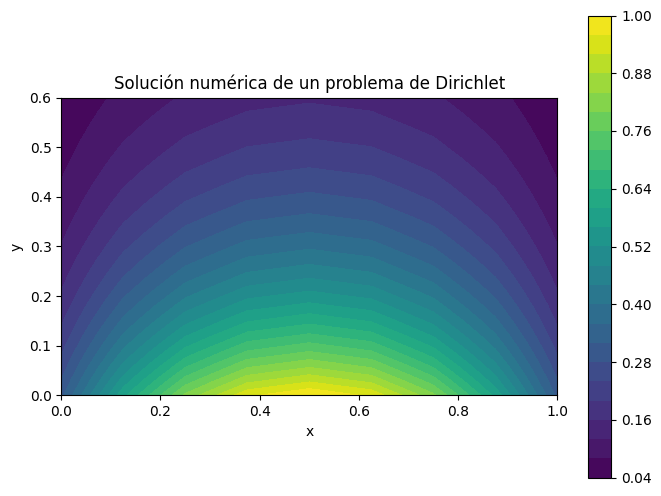

<Figure size 640x480 with 0 Axes>

In [60]:
# Codigo extraido de Github
# Mapa de colores
plt.figure(figsize=(8, 6))                                    #Tamaño de la grafiica
contour = plt.contourf(X, Y, U, levels=25, cmap=cm.viridis)
plt.colorbar(contour)                                         #Barra de colores
plt.title('Solución numérica de un problema de Dirichlet')    #Titulo
plt.xlabel('x')                                               #Eje X
plt.ylabel('y')                                               #Eje Y
plt.gca().set_aspect('equal', adjustable='box')               #Aspecto de la grafica
plt.show()                                                    #Mostramos la grafica
plt.savefig('Solución numérica de un problema de Dirichlet')  #Guardamos la grafica

<font size=3><p>
La grafica aux. de colores, indica la temperatura en base al color, por lo que el amarillo, tiene un mayor a comparacion del morada.</p><p>
Podemos observar que el calor se difusa en forma de ondas, por lo que, donde se produce el contacto, (la zona amarilla) esta aumentando su temperatura, mientras que las partes mas alejadas (la zona morada) permanecen con su temperatura inicial.</p><p>
Numericamente implica que los valores en las partes del mismo color, son muy parecidos, (al ser curvas, tienen un valor similar, en caso de ser semicirculos perfectos, su valor en la curva es constante ya que $x^2+y^2=r^2$), son mas parecidos a elipses, por lo cual su valor no es igual, excepto en los puntos donde inicia y termina, que serian en el eje $X$.

---

<font size=3 color="purple"> Explicar la gráfica </font>

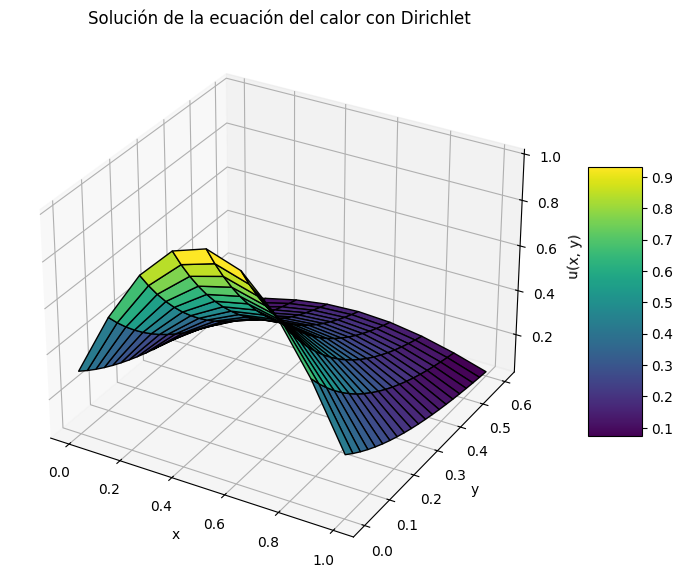

In [61]:
# Codigo extraido de Github
#%matplotlib notebook
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de la ecuación del calor con Dirichlet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

<font size=3><p>
La grafica aux. de colores, indica la temperatura en base al color, por lo que el amarillo, tiene un mayor a comparacion del morada.</p><p>
Podemos observar que el calor se difusa en forma de ondas, por lo que, donde se produce el contacto, (la zona amarilla) esta aumentando su temperatura, mientras que las partes mas alejadas (la zona morada) permanecen con su temperatura inicial.</p><p>
Numericamente implica que los valores en las partes del mismo color, son muy parecidos, (al ser curvas, tienen un valor similar, en caso de ser semiesferas perfectas, su valor en la curva es constante ya que $x^2+y^2+z^2=r^2$), son mas parecidos a elipsoides, por lo cual su valor no es igual, excepto en los puntos donde inicia y termina, que serian sus ejes $X,Y$.

---

<font size=4 color="skyblue">Ejercicio 6: </font> <font size=4>Hay un ligero detalle con la precisión de estas gráficas, ¿cuál?

<font size=3>
En el vector x, indicamos 9 puntos, 0.1->0.9, pero en la grafica solo representa 5 puntos, por lo la precision de la grafica es menor, al solo representar poco mas de la mitad de la información.</font>

Matriz A 

Matriz b 

Matriz U 



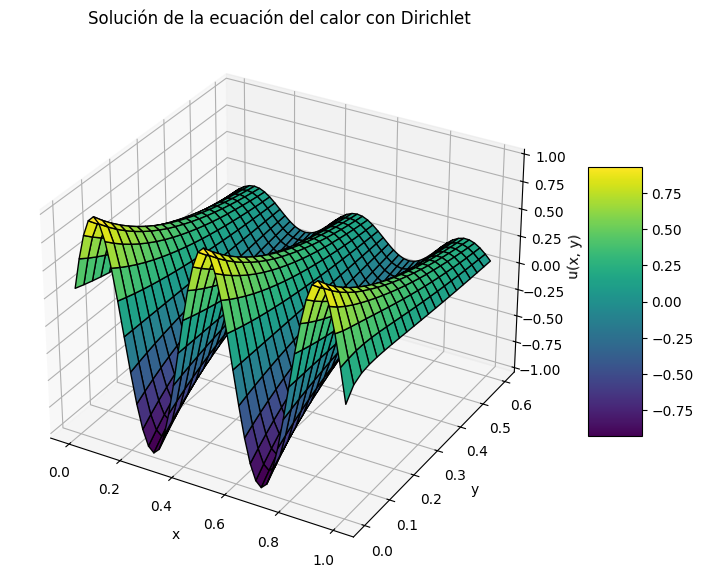

In [75]:
n=50         # Tamaño de la Matriz A_nxn
# Variables
dp = 3      # Valor en la diagonal principal
ds = -1     # Valor en las diagonales superior e inferior

A2 = sp.Matrix(                          # Creamos la matriz con sp, para que tenga el mismo formato
        np.diag(np.full(n, dp)) +          # Indicamos que la diagonal principal sean 3, 9x3
        np.diag(np.full(n-1, ds), k=1) +   # Indicamos que la diagonal superior sean -1, 8x1
        np.diag(np.full(n-1, ds), k=-1))   # Indicamos que la diagonal inferior sean -1, 8x1

print("Matriz A \n")

b3 = sp.Matrix([f(0.1*(i+1)) for i in range(n)])   # Creamos una Matriz con los valores de la f(i+1)

print("Matriz b \n")

j2 = 20 # Número de pasos en el tiempo
U = richardson(A2, b3, j2)  #Valores de las soluciones
x = np.linspace(0, 1, n) #Número de nodos internos en X
y = np.linspace(0, 0.6, j2+1) #Debe coincidir con el tamaño de j por k (tiempo)
X, Y = np.meshgrid(x, y)

print("Matriz U \n")

# Codigo extraido de Github
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de la ecuación del calor con Dirichlet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

<font size=3>Creando una exageración en la dimension de $A$ y $B$, vemos que aun asi la representacion sigue igual, siendo de la grafica de solo 5 puntos en $X$</font>